# Baseline model

Esta notebook presenta como utilizar el dataset con un modelo dado

## Importo el dataset

In [15]:
import pandas as pd
import numpy as np

In [16]:
train = pd.read_csv("data/train.csv", index_col = "Unnamed: 0")
test = pd.read_csv("data/test.csv", index_col = "Unnamed: 0")

In [17]:
y_train, y_test = train.target, test.target 
X_train, X_test = train.drop('target', axis = 1), test.drop('target', axis = 1)

## Aplico NaiveBayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Verifico performance de NaiveBayes

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

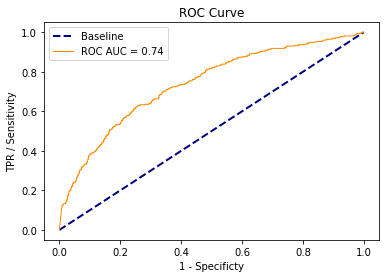

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
auc_score = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw = 2)
plt.plot(fpr, tpr, color = 'darkorange', lw = 1)
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.legend(['Baseline', f'ROC AUC = {auc_score:.2f}'])

In [80]:
print(f'Naive Bayes F1 Score = {f1_score(y_test, y_pred):.2f}')

Naive Bayes F1 Score = 0.56


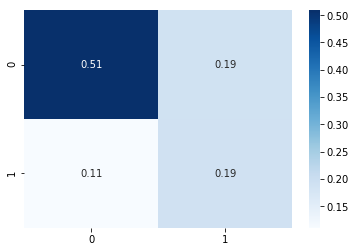

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'all'), annot = True, cmap="Blues")